On souhaite analyser les donnée extraite du site (https://sparse.tamu.edu/)

In [64]:
import pandas as pd 

df = pd.read_csv("computationnal_fluid_dynamics_unformat.csv" , sep=" 	")


/tmp/ipykernel_18104/1351821070.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("computationnal_fluid_dynamics_unformat.csv" , sep=" 	")


In [65]:
df.head(100)

,Id,Name,Group,Rows,Cols,Nonzeros,Kind,Date,Download File
0,2804,mawi_201512020330,MAWI,"226,196,185","226,196,185","480,047,894",Undirected Weighted Graph,2015,NaN
1,2384,HV15R,Fluorem,"2,017,169","2,017,169","283,073,458",Computational Fluid Dynamics Problem,2011,NaN
2,2803,mawi_201512020130,MAWI,"128,568,730","128,568,730","270,234,840",Undirected Weighted Graph,2015,NaN
3,2802,mawi_201512020030,MAWI,"68,863,315","68,863,315","143,414,960",Undirected Weighted Graph,2015,NaN
4,2549,Cube_Coup_dt6,Janna,"2,164,760","2,164,760","124,406,070",Structural Problem,2012,NaN
...,...,...,...,...,...,...,...,...,...
95,814,raefsky1,Simon,"3,242","3,242","293,409",Computational Fluid Dynamics Problem Sequence,1993,NaN
96,1319,airfoil_2d,Engwirda,"14,214","14,214","259,688",Computational Fluid Dynamics Problem,2006,NaN
97,415,ex19,FIDAP,"12,005","12,005","259,577",Computational Fluid Dynamics Problem,1994,NaN
98,431,ex35,FIDAP,"19,716","19,716","227,872",Computational Fluid Dynamics Problem,1994,NaN


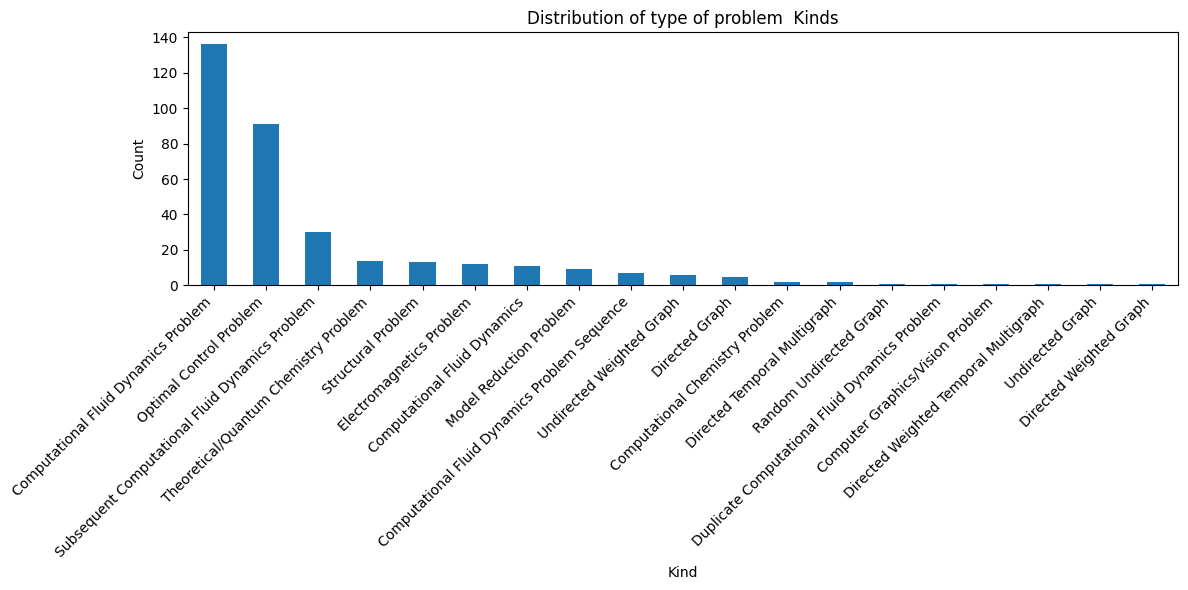

In [66]:
import matplotlib.pyplot as plt

df["Kind"].value_counts().plot(kind="bar", figsize=(12, 6))
plt.xticks(rotation=45, ha='right')  # rotate labels
plt.xlabel("Kind")
plt.ylabel("Count")
plt.title("Distribution of type of problem  Kinds")
plt.tight_layout()
plt.show()


In [67]:
df_cfd= df[df["Kind"].isin(["Computational Fluid Dynamics Problem",  "Subsequent Computational Fluid Dynamics Problem"  
                         , "Computational Fluid Dynamics" ,"Computational Fluid Dynamics Problem Sequence"]) ]

In [68]:
df_cfd["Rows"] = df_cfd["Rows"].str.replace(",", "", regex=False).astype(int)
df_cfd["Cols"] = df_cfd["Cols"].str.replace(",", "", regex=False).astype(int)
df_cfd["Nonzeros"] = df_cfd["Nonzeros"].str.replace(",", "", regex=False).astype(int)



/tmp/ipykernel_18104/4012710383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cfd["Rows"] = df_cfd["Rows"].str.replace(",", "", regex=False).astype(int)
/tmp/ipykernel_18104/4012710383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cfd["Cols"] = df_cfd["Cols"].str.replace(",", "", regex=False).astype(int)
/tmp/ipykernel_18104/4012710383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [69]:
df_cfd

,Id,Name,Group,Rows,Cols,Nonzeros,Kind,Date,Download File
1,2384,HV15R,Fluorem,2017169,2017169,283073458,Computational Fluid Dynamics Problem,2011,NaN
15,2337,RM07R,Fluorem,381689,381689,37464962,Computational Fluid Dynamics Problem,2010,NaN
20,2547,StocF-1465,Janna,1465137,1465137,21005389,Computational Fluid Dynamics Problem,2011,NaN
24,2268,atmosmodm,Bourchtein,1489752,1489752,10319760,Computational Fluid Dynamics Problem,2009,NaN
25,2267,atmosmodl,Bourchtein,1489752,1489752,10319760,Computational Fluid Dynamics Problem,2009,NaN
...,...,...,...,...,...,...,...,...,...
339,318,olm100,Bai,100,100,396,Computational Fluid Dynamics Problem,1994,NaN
340,337,tub100,Bai,100,100,396,Computational Fluid Dynamics Problem,1994,NaN
341,253,steam3,HB,80,80,314,Computational Fluid Dynamics Problem,1983,NaN
342,436,ex5,FIDAP,27,27,279,Computational Fluid Dynamics Problem,1994,NaN


In [70]:
df_cfd.describe()

,Id,Rows,Cols,Nonzeros,Date,Download File
count,184.000000,1.840000e+02,1.840000e+02,1.840000e+02,184.000000,0.0
mean,883.277174,6.751666e+04,6.751666e+04,2.497905e+06,1996.413043,NaN
std,809.991192,2.730821e+05,2.730821e+05,2.109435e+07,9.076665,NaN
min,35.000000,2.700000e+01,2.700000e+01,1.800000e+02,1980.000000,NaN
25%,375.750000,1.067500e+03,1.067500e+03,7.851750e+03,1993.750000,NaN
50%,424.500000,3.087500e+03,3.087500e+03,6.673300e+04,1994.000000,NaN
75%,1285.250000,1.370475e+04,1.370475e+04,3.276800e+05,1997.250000,NaN
max,2830.000000,2.017169e+06,2.017169e+06,2.830735e+08,2018.000000,NaN


<AxesSubplot: >

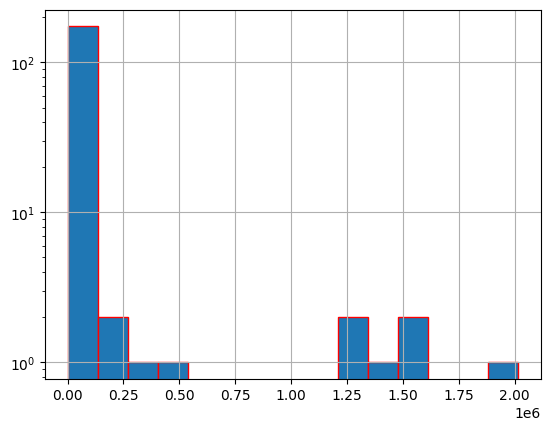

In [79]:
import matplotlib.pyplot as plt

df_cfd["Rows"].hist(bins=15, log=True , ec="red")

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plt.hist(df_cfd,bins=15, log=True , ec="red" )
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plt.hist(df_cfd,bins=15, log=True , ec="red" )
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plt.hist(df_cfd,bins=15, log=True , ec="red" )
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plt.hist(df_cfd,bins=15, log=True , ec="red" )
axs[1, 1].set_title('Axis [1, 1]')